## Источник: Машинное обучение, Материаы ФКН ВШЭ (2018)

## Практическое задание 1

### Общая информация

Мягкий дедлайн: 14.03.2022 

Жесткий дедлайн:  

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи


## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [10]:
# your code
print("Hello, my friend")
2+3

Hello, my friend


5

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [11]:
%pylab inline  
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Монтируем гугл диск. Выйдет окно диалога - надо разрешить доступ 
from google.colab import drive
drive.mount ('/content/drive') 

Mounted at /content/drive


In [83]:
#Здесь будет ваш путь к папке на диске
#Надо залить файл с данными на Google диск, щелкнуть на значок папки слева, найти файл, через контекстное меню скопировать путь и вставить сюда
df=pd.read_csv("./task1_data.csv")

In [16]:
df.head(15)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [264]:
# your code
df=pd.read_csv("./task1_data.csv")
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [36]:
# your code
df['order_id'].unique()[len(df['order_id'].unique()) - 1]

1834

In [37]:
# your code
len(df['item_name'].unique())

50

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [38]:
# your code
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [50]:
# your code
df['choice_description'].fillna("")

0                                                        
1                                            [Clementine]
2                                                 [Apple]
3                                                        
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [265]:
# your code
for i in range(0, len(df['item_price'])):
    df['item_price'][i] = df['item_price'][i].replace('$','').strip()
    

C:\Users\Vladi\AppData\Local\Temp/ipykernel_23360/3742241119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_price'][i] = df['item_price'][i].replace('$','').strip()


In [266]:
df['item_price(float)'] = df['item_price'].astype (float)

In [111]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price(float)
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98


Какая средняя/минимальная/максимальная цена у товара? 

In [108]:
df['item_price(float)'].mean()

7.464335785374297

In [109]:
df['item_price(float)'].max()

44.25

In [110]:
df['item_price(float)'].min()

1.09

Удалите старую колонку с ценой.

In [267]:
# your code
df.drop(columns = ['item_price'])

,order_id,quantity,item_name,choice_description,item_price(float)
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [137]:
# your code
df.sort_values(by='item_price(float)').head(5)

,order_id,quantity,item_name,choice_description,item_price,item_price(float)
1140,471,1,Bottled Water,NaN,1.09,1.09
821,338,1,Canned Soda,[Coca Cola],1.09,1.09
3926,1575,1,Canned Soda,[Dr. Pepper],1.09,1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09,1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09,1.09


In [136]:
df.sort_values(by='item_price(float)').tail(5)

,order_id,quantity,item_name,choice_description,item_price,item_price(float)
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,35.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,35.00
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,35.25
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,44.25


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [159]:
# your code
len(df.query("quantity >= 2 and item_name == 'Chicken Bowl'"))

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [141]:
# your code
df.groupby(['order_id'])['item_price(float)'].sum().mean()

18.811428571428568

#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [190]:
# your code
df2 = df.groupby(['order_id'])['quantity'].sum()
sum = 0
for elem in df2:
    if(elem == 1):
        sum += 1
print(sum)

56


#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [183]:
# your code
df.groupby(['item_name'])['quantity'].sum().sort_values(ascending = False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [208]:
# your code
df.loc[(df['item_name'] == 'Burrito') | (df['item_name'] == 'Carnitas Burrito') | (df['item_name'] == 'Barbacoa Burrito') | (df['item_name'] == 'Veggie Burrito') | (df['item_name'] == 'Steak Burrito') | (df['item_name'] == 'Chicken Burrito')]['item_name'].unique()

array(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito',
       'Carnitas Burrito', 'Veggie Burrito', 'Burrito'], dtype=object)

In [210]:
df.loc[(df['item_name'] == 'Burrito') | (df['item_name'] == 'Carnitas Burrito') | (df['item_name'] == 'Barbacoa Burrito') | (df['item_name'] == 'Veggie Burrito') | (df['item_name'] == 'Steak Burrito') | (df['item_name'] == 'Chicken Burrito')].groupby(['item_name'])['quantity'].sum().sort_values(ascending = False)

item_name
Chicken Burrito     591
Steak Burrito       386
Veggie Burrito       97
Barbacoa Burrito     91
Carnitas Burrito     60
Burrito               6
Name: quantity, dtype: int64

In [226]:
df.loc[((df['item_name'] == 'Burrito') | (df['item_name'] == 'Carnitas Burrito') | (df['item_name'] == 'Barbacoa Burrito') | (df['item_name'] == 'Veggie Burrito') | (df['item_name'] == 'Steak Burrito') | (df['item_name'] == 'Chicken Burrito')) & (df['quantity'] == 1)].groupby(['item_name'])['item_price(float)'].max().sort_values(ascending = False)

item_name
Barbacoa Burrito    11.75
Carnitas Burrito    11.75
Steak Burrito       11.75
Chicken Burrito     11.25
Veggie Burrito      11.25
Burrito              7.40
Name: item_price(float), dtype: float64

#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [ ]:
# your code


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [251]:
# your code
sum1 = df.loc[df['choice_description'] == '[Diet Coke]']['item_price(float)'].sum()
sum2 = df.loc[df['choice_description'] == '[Diet Coke]'].replace(1.25,1.35).replace(2.50,2.70).replace(3.75,3*1.35)['item_price(float)'].sum()
print(str((sum2/sum1)*100 - 100) + " %")

3.519941232285518 %


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [263]:
data = np.random.rand(10, 3)

# your code
df3 = pd.DataFrame(data, columns= ['index','column1','column2'])
df3.head()

,index,column1,column2
0,0.915648,0.266400,0.145275
1,0.562838,0.511878,0.382531
2,0.896312,0.026580,0.828252
3,0.032981,0.691006,0.199388
4,0.079211,0.269428,0.293328


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [260]:
# your code
df3.to_csv('out.csv', columns=None, index = False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

In [272]:
%matplotlib inline  
#нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [273]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

In [276]:
df

,order_id,quantity,item_name,choice_description,item_price,item_price(float),date
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,2018-01-11
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-11
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-11
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,2018-01-11
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,2018-01-07
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,2018-01-01
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,2018-01-01
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,2018-01-09
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,2018-01-09


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

(array([1.685e+03, 1.190e+02, 1.200e+01, 9.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10.08 ,  29.597,  49.114,  68.631,  88.148, 107.665, 127.182,
        146.699, 166.216, 185.733, 205.25 ]),
 <BarContainer object of 10 artists>)

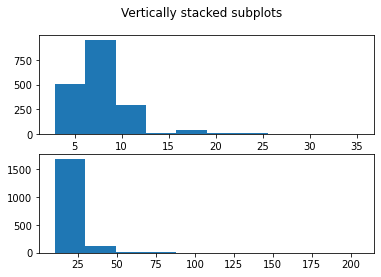

In [279]:
# your code
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.hist(df.groupby(['order_id'])['item_price(float)'].mean())
ax2.hist(df.groupby(['order_id'])['item_price(float)'].sum())

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

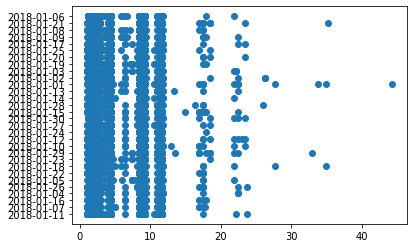

In [288]:
# your code
plt.scatter(df['item_price(float)'],df['date'])

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

<BarContainer object of 4622 artists>

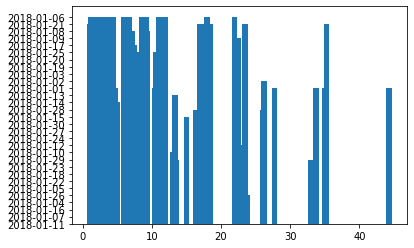

In [290]:
# your code
plt.bar(df['item_price(float)'],df['date'])

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

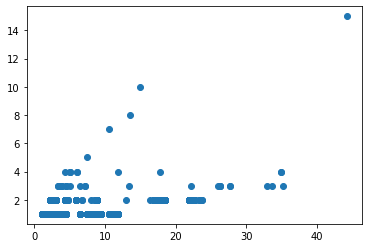

In [282]:
# your code
plt.scatter(df['item_price(float)'], df['quantity'])

Сохраните график в формате pdf (так он останется векторизованным).

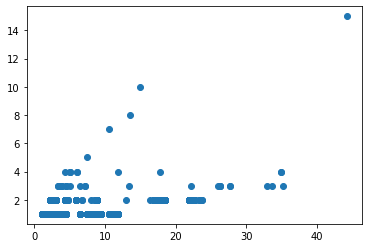

In [294]:
# your code
plt.scatter(df['item_price(float)'], df['quantity'])
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 